# Basic Instructions

1. Enter your Name and UID in the provided space.
2. Do the assignment in the notebook itself
3. you are free to use Google Colab


Name:  **Arpit Aggarwal**  
UID:  **116747189**

In the first part, you will implement all the functions required to build a two layer neural network.
In the next part, you will use these functions for image and text classification. Provide your code at the appropriate placeholders.

## 1. Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

## 2. Layer Initialization

**Exercise:** Create and initialize the parameters of the 2-layer neural network. Use random initialization for the weight matrices and zero initialization for the biases.

In [2]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [3]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.01744812 -0.00761207]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>

## 3. Forward Propagation

Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.

The linear module computes the following equation:

$$Z = WA+b\tag{4}$$

### 3.1 Exercise: Build the linear part of forward propagation.

In [4]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    
    Z = np.dot(W, A) + b
    
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [5]:
np.random.seed(1)

A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**Expected output**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td> 
  </tr>
  
</table>

### 3.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. Write the code for the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. Write the code for the  `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)

**Exercise**: 
- Implement the activation functions
- Build the linear activation part of forward propagation. Mathematical relation is: $A = g(Z) = g(WA_{prev} +b)$

In [6]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z, useful during backpropagation
    """
    ### START CODE HERE ### (≈ 2 line of code)
    
    A = 1.0 / (1.0 + np.exp(-Z))
    cache = Z
    
    ### END CODE HERE ###
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache --  returns Z, useful during backpropagation
    """
    
    ### START CODE HERE ### (≈ 2 line of code)

    A = np.maximum(0, Z)
    cache = Z
    
    ### END CODE HERE ###
    
    assert(A.shape == Z.shape) 
    return A, cache

In [7]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [8]:
np.random.seed(2)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


## 4 - Loss function

Now you will implement forward and backward propagation. You need to compute the loss, because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy loss $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{ (i)}\right) + (1-y^{(i)})\log\left(1- a^{(i)}\right)) \tag{7}$$

In [9]:
# GRADED FUNCTION: compute_loss

def compute_loss(A, Y):
    """
    Implement the loss function defined by equation (7).

    Arguments:
    A -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    loss -- cross-entropy loss
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    
    loss = (-1.0 / m) * np.sum((Y * np.log(A)) + ((1.0 - Y) * np.log(1.0 - A)))
    
    ### END CODE HERE ###
    
    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())
    
    return loss

In [10]:
Y = np.asarray([[1, 1, 1]])
A = np.array([[.8,.9,0.4]])

print("loss = " + str(compute_loss(A, Y)))

loss = 0.41493159961539694


**Expected Output**:

<table>
    <tr>
    <td>**loss** </td>
    <td> 0.41493159961539694</td> 
    </tr>
</table>

## 5 - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

Now, similar to forward propagation, you are going to build the backward propagation in two steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation

### 5.1 - Linear backward

In [11]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the loss with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the loss with respect to W (current layer l), same shape as W
    db -- Gradient of the loss with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)

    dA_prev = np.dot(W.T, dZ)
    dW = np.dot(dZ, A_prev.T)
    db = np.array([np.sum(dZ, axis = 1)]).T
    
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [12]:
np.random.seed(1)
dZ = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
linear_cache = (A, W, b)

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.2015379   2.81370193  3.2998501 ]]
db = [[1.01258895]]


**Expected Output**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] </td> 
  </tr> 
    <tr>
        <td> **dW** </td>
        <td > [[-0.2015379   2.81370193  3.2998501 ]] </td> 
    </tr> 
    <tr>
        <td> **db** </td>
        <td> [[1.01258895]] </td> 
    </tr>     
</table>

### 5.2 - Linear Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

Before implementing `linear_activation_backward`, you need to implement two backward functions for each activations:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Exercise**: 
- Implement the backward functions for the relu and sigmoid activation layer.
- Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [13]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the loss with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    ### START CODE HERE ### (≈ 1 line of code)
    
    dZ = dA * np.where(Z <= 0, 0, 1)
    
    ### END CODE HERE ###
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the loss with respect to Z
    """
    
    Z = cache
    
    ### START CODE HERE ### (≈ 2 line of code)
    
    sigmoid_derivative = sigmoid(Z)[0] * (1.0 - sigmoid(Z)[0])
    dZ = dA * sigmoid_derivative
    
    ### END CODE HERE ###
    
    assert (dZ.shape == Z.shape)
    
    return dZ


In [14]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the loss with respect to W (current layer l), same shape as W
    db -- Gradient of the loss with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [15]:
np.random.seed(2)
dA = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)
linear_cache = (A, W, b)
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)

dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.20533573  0.19557101 -0.03936168]]
db = [[-0.11459244]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228  -0.        ]]
dW = [[ 0.89027649  0.74742835 -0.20957978]]
db = [[-0.41675785]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 
  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.20533573  0.19557101 -0.03936168]] </td> 
  </tr> 
    <tr>
    <td > db </td> 
           <td > [[-0.11459244]] </td> 
  </tr> 
</table>

**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 
  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.89027649  0.74742835 -0.20957978]] </td> 
  </tr> 
    <tr>
    <td > db </td> 
           <td > [[-0.41675785]] </td> 
  </tr> 
</table>

### 6 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[1]} = W^{[1]} - \alpha \text{ } dW^{[1]} \tag{16}$$
$$ b^{[1]} = b^{[1]} - \alpha \text{ } db^{[1]} \tag{17}$$
$$ W^{[2]} = W^{[2]} - \alpha \text{ } dW^{[2} \tag{16}$$
$$ b^{[2]} = b^{[2]} - \alpha \text{ } db^{[2]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent.


In [16]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 4 lines of code)
    
    for key in parameters:
        parameters[key] = parameters[key] - (learning_rate * grads["d" + str(key)])
    
    ### END CODE HERE ###
    return parameters

In [17]:
np.random.seed(2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3,4)
db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3)
db2 = np.random.randn(1,1)
grads = {"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>



## 7 - Conclusion

Congrats on implementing all the functions required for building a deep neural network! 

We know it was a long assignment but going forward it will only get better. The next part of the assignment is easier. 



# Part 2:

In the next part you will put all these together to build a two-layer neural networks for image classification.

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

# Dataset

**Problem Statement**: You are given a dataset ("data/train_catvnoncat.h5", "data/test_catvnoncat.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by completing the function and run the cell below.

In [19]:
def load_data(train_file, test_file):
    # Load the training data
    train_dataset = h5py.File(train_file, 'r')
    
    # Separate features(x) and labels(y) for training set
    train_set_x_orig = np.array(train_dataset['train_set_x'])
    train_set_y_orig = np.array(train_dataset['train_set_y'])

    # Load the test data
    test_dataset = h5py.File(test_file, 'r')
    
    # Separate features(x) and labels(y) for training set
    test_set_x_orig = np.array(test_dataset['test_set_x'])
    test_set_y_orig = np.array(test_dataset['test_set_y'])

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [20]:
train_file="data/train_catvnoncat.h5"
test_file="data/test_catvnoncat.h5"
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_file, test_file)

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = 0. It's a non-cat picture.


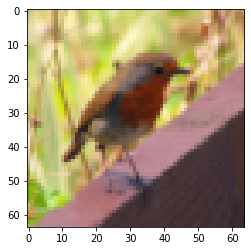

In [21]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [22]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network.

<img src="imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [23]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 3 - Architecture of your model

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

###  2-layer neural network

<img src="2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.


###  General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute loss function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those the model!


**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_loss(AL, Y):
    ...
    return loss
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```


In [24]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 14
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [25]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_loss -- If set to True, this will print the loss every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    losses = []                              # to keep track of the loss
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        ### END CODE HERE ###
        
        # Compute loss
        ### START CODE HERE ### (≈ 1 line of code)
        
        loss = compute_loss(A2, Y)
        
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))/m
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        ### START CODE HERE ### (≈ 4 lines of code)
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        ### END CODE HERE ###
        
    
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the loss every 100 training example
        if print_loss and i % 100 == 0:
            print("Loss after iteration {}: {}".format(i, np.squeeze(loss)))
        if print_loss and i % 100 == 0:
            losses.append(loss)
       
    # plot the loss

    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Loss after iteration 0: 0.6897576016609726
Loss after iteration 100: 0.5005103970842145
Loss after iteration 200: 0.4591366577945993
Loss after iteration 300: 0.3770052403577409
Loss after iteration 400: 0.2602361949176332
Loss after iteration 500: 0.3210213987659625
Loss after iteration 600: 0.1367893333118584
Loss after iteration 700: 0.03359939981401825
Loss after iteration 800: 0.019386051135145306
Loss after iteration 900: 0.011123321804135526
Loss after iteration 1000: 0.008085966068735755
Loss after iteration 1100: 0.00616150541674634
Loss after iteration 1200: 0.004954980443160653
Loss after iteration 1300: 0.00412527939969342
Loss after iteration 1400: 0.003518870206173741
Loss after iteration 1500: 0.003061308333436289
Loss after iteration 1600: 0.002695432614851714
Loss after iteration 1700: 0.0024031455850395153
Loss after iteration 1800: 0.0021657663882503936
Loss after iteration 1900: 0.0019666545525735507
Loss after iteration 2000: 0.0017992090366167263
Loss after iterat

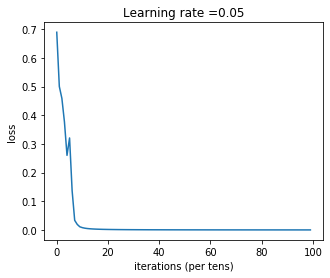

In [26]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate=0.05, num_iterations = 10000, print_loss=True)

**Expected Output**:
<table> 
    <tr>
        <td> **Loss after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Loss after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Loss after iteration 2400**</td>
        <td> 0.048554785628770206 </td>
    </tr>
</table>

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. 

***Exercise:*** 
- Implement the forward function
- Implement the predict function below to make prediction on test_images

In [27]:
def two_layer_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    
    # Implement LINEAR -> RELU. Add "cache" to the "caches" list.
    ### START CODE HERE ### (approx. 3 line of code)
        
    W1, b1 = parameters["W1"], parameters["b1"]
    A1, cache1 = linear_activation_forward(A, W1, b1, "relu")
    caches.append(cache1)
    
    ### END CODE HERE ###

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (approx. 3 line of code)
        
    W2, b2 = parameters["W2"], parameters["b2"]
    A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
    caches.append(cache2)
    
    ### END CODE HERE ###

    assert(A2.shape == (1,X.shape[1]))
            
    return A2, caches

In [28]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    ### START CODE HERE ### (≈ 1 lines of code)
    
    probas, caches = two_layer_forward(X, parameters)
    
    ### END CODE HERE ###
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        ### START CODE HERE ### (≈ 4 lines of code)
        
        if(probas[0][i] > 0.5):
            p[0][i] = 1
        else:
            p[0][i] = 0
        
        ### END CODE HERE ###
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    return p

In [29]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [30]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.76


***Exercise:***
Identify the hyperparameters in the model and For each hyperparameter
- Briefly explain its role
- Explore a range of values and describe their impact on (a) training loss and (b) test accuracy
- Report the best hyperparameter value found.

Note: Provide your results and explanations in the report for this question.

**Hyperparameters**
The hyperparameters are:
1. Learning rate -  It is used for updating the parameters of the neural network that is the weights and biases of the neural network. It controls the amount of update that needs to take place so that we are able to reach the minima of the loss function.

2. Epochs - It represents the number of times the network sees the data and adjusts its parameters for optimal learning.

3. Number of hidden neurons in the hidden layer - The number of neurons in the hidden layer where each neuron is learning some properties of the input data and able to establish a relationship between input and output.


**Values of Hyperparameters tried:**
1. Learning rate = 0.0075, Epochs = 2500, Hidden neurons = 7, Training loss = 0.0485, Testing accuracy: 72%

2. Learning rate = 0.0075, Epochs = 3000, Hidden neurons = 7, Training loss = 0.03, Testing accuracy: 72%

3. Learning rate = 0.01, Epochs = 8000, Hidden neurons = 7, Training loss = 0.0023, Testing accuracy: 72%

4. Learning rate = 0.01, Epochs = 10000, Hidden neurons = 7, Training loss = 0.001, Testing accuracy: 72%

5. Learning rate = 0.1, Epochs = 10000, Hidden neurons = 7, Training loss = 0.24, Testing accuracy: 62%

6. Learning rate = 0.001, Epochs = 10000, Hidden neurons = 7, Training loss = 0.16, Testing accuracy: 74%

7. Learning rate = 0.01, Epochs = 10000, Hidden neurons = 14, Training loss = 0.0015, Testing accuracy: 74%

8. Learning rate = 0.01, Epochs = 10000, Hidden neurons = 21, Training loss = 0.0014, Testing accuracy: 74%

9. Learning rate = 0.01, Epochs = 10000, Hidden neurons = 28, Training loss = 0.0014, Testing accuracy: 74%

10. Learning rate = 0.01, Epochs = 10000, Hidden neurons = 35, Training loss = 0.0014, Testing accuracy: 74%

11. Learning rate = 0.03, Epochs = 8000, Hidden neurons = 14, Training loss = 0.0004, Testing accuracy: 76%

12. Learning rate = 0.05, Epochs = 8000, Hidden neurons = 14, Training loss = 0.0002, Testing accuracy: 76%

13. Learning rate = 0.07, Epochs = 8000, Hidden neurons = 14, Training loss = 0.006, Testing accuracy: 72%

14. Learning rate = 0.05, Epochs = 8000, Hidden neurons = 28, Training loss = 0.0002, Testing accuracy: 74%

15. Learning rate = 0.05, Epochs = 8000, Hidden neurons = 21, Training loss = 0.001, Testing accuracy: 68%

16. Learning rate = 0.05, Epochs = 10000, Hidden neurons = 14, Training loss = 0.0001, Testing accuracy: 76%


**Optimal hyperparameters found**
1. Learning rate = 0.05
2. Epochs = 10000
3. Number of hidden neurons = 14

##  Results Analysis

First, let's take a look at some images the 2-layer model labeled incorrectly. This will show a few mislabeled images.

In [31]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

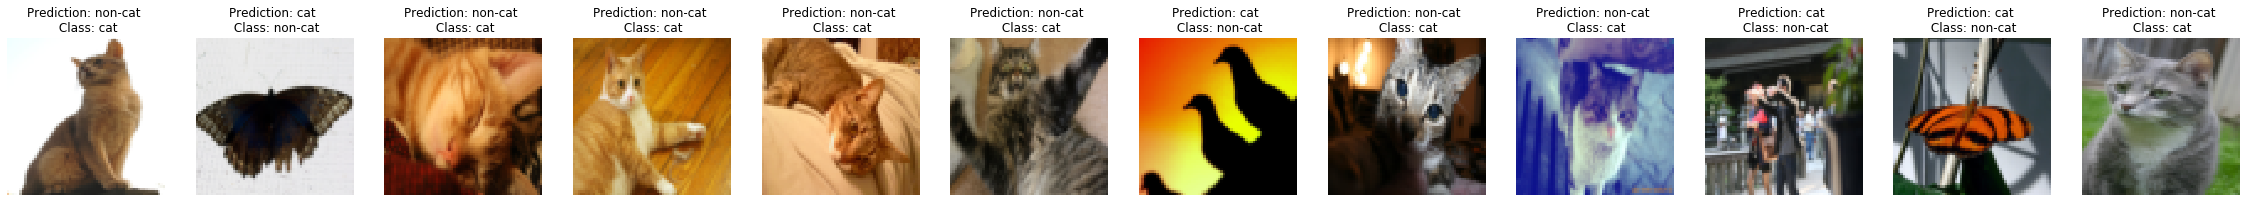

In [32]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)

***Exercise:*** Identify a few types of images that tends to perform poorly on the model

**Answer**
The model performs poorly when the cat is at certain angle or rotated at some angle, which makes it classify it as a non-cat class.

Now, lets use the same architecture to predict sentiment of movie reviews. In this section, most of the implementation is already provided. The exercises are mainly to understand what the workflow is when handling the text data.

In [33]:
import re

# Dataset

**Problem Statement**: You are given a dataset ("train_imdb.txt", "test_imdb.txt") containing:
    - a training set of m_train reviews 
    - a test set of m_test reviews 
    - the labels for the training examples are such that the first 50% belong to class 1 (positive) and the rest 50% of the data belong to class 0(negative)
    
Let's get more familiar with the dataset. Load the data by completing the function and run the cell below.

In [34]:
def load_data(train_file, test_file):
    train_dataset = []
    test_dataset = []
    
    # Read the training dataset file line by line
    for line in open(train_file, 'r'):
        train_dataset.append(line.strip())
        
    for line in open(test_file, 'r'):
        test_dataset.append(line.strip())
    return train_dataset, test_dataset

In [35]:
train_file = "data/train_imdb.txt"
test_file = "data/test_imdb.txt"
train_dataset, test_dataset = load_data(train_file, test_file)

In [36]:
# This is just how the data is organized. The first 50% data is positive and the rest 50% is negative for both train and test splits.
y = [1 if i < len(train_dataset)*0.5 else 0 for i in range(len(train_dataset))]

As usual, lets check our dataset 

In [37]:
# Example of a review
index = 10
print(train_dataset[index])
print ("y = " + str(y[index]))

I liked the film. Some of the action scenes were very interesting, tense and well done. I especially liked the opening scene which had a semi truck in it. A very tense action scene that seemed well done.<br /><br />Some of the transitional scenes were filmed in interesting ways such as time lapse photography, unusual colors, or interesting angles. Also the film is funny is several parts. I also liked how the evil guy was portrayed too. I'd give the film an 8 out of 10.
y = 1


In [38]:
# Explore your dataset 
m_train = len(train_dataset)
m_test = len(test_dataset)

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))

Number of training examples: 1001
Number of testing examples: 201


## Pre-Processing

From the example review, you can see that the raw data is really noisy! This is generally the case with the text data. Hence, Preprocessing the raw input and cleaning the text is  essential. Please run the code snippet provided below.

**Exercise**: Explain what pattern the model is trying to capture using re.compile in your report. 

**Answer**
1. re.compile() removes special characters like ', . "  etc and makes all characters in lowercase. It is learning properties from words.

In [39]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

train_dataset_clean = preprocess_reviews(train_dataset)
test_dataset_clean = preprocess_reviews(test_dataset)

In [40]:
# Example of a clean review
index = 10
print(train_dataset_clean[index])
print ("y = " + str(y[index]))

i liked the film some of the action scenes were very interesting tense and well done i especially liked the opening scene which had a semi truck in it a very tense action scene that seemed well done some of the transitional scenes were filmed in interesting ways such as time lapse photography unusual colors or interesting angles also the film is funny is several parts i also liked how the evil guy was portrayed too id give the film an  out of 
y = 1


## Vectorization

Now lets create a feature vector for our reviews based on a simple bag of words model. So, given an input text, we need to create a numerical vector which is simply the vector of word counts for each word of the vocabulary. Run the code below to get the feature representation.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, stop_words="english", max_features=2000)
cv.fit(train_dataset_clean)
X = cv.transform(train_dataset_clean)
X_test = cv.transform(test_dataset_clean)

CountVectorizer provides a sparse feature representation by default which is reasonable because only some words occur in individual example. However, for training neural network models, we generally use a dense representation vector.

In [42]:
X = np.array(X.todense()).astype(float)
X_test = np.array(X_test.todense()).astype(float)
y = np.array(y)

## Model

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.80
)

In [44]:
# This is just to correct the shape of the arrays as required by the two_layer_model
X_train = X_train.T
X_val = X_val.T
y_train = y_train.reshape(1,-1)
y_val = y_val.reshape(1,-1)

In [45]:
### CONSTANTS DEFINING THE MODEL ####
n_x = X_train.shape[0]    
n_h = 200
n_y = 1
layers_dims = (n_x, n_h, n_y)

We will use the same two layer model that you completed in the previous section for training.

Loss after iteration 0: 0.6931669649893015
Loss after iteration 100: 0.6874292042033144
Loss after iteration 200: 0.6597144317222486
Loss after iteration 300: 0.5307636749107454
Loss after iteration 400: 0.33384385320577264
Loss after iteration 500: 0.21244588141292753
Loss after iteration 600: 0.1432223796712702
Loss after iteration 700: 0.1012999651610651
Loss after iteration 800: 0.07461707348889567
Loss after iteration 900: 0.05686657164001318
Loss after iteration 1000: 0.04466704096581919
Loss after iteration 1100: 0.03605012060334668
Loss after iteration 1200: 0.029786383758999974
Loss after iteration 1300: 0.02510388722392519
Loss after iteration 1400: 0.02151296119183033
Loss after iteration 1500: 0.018698094499721974
Loss after iteration 1600: 0.01644791728269799
Loss after iteration 1700: 0.014618365747086927
Loss after iteration 1800: 0.013109001697082156
Loss after iteration 1900: 0.011847392036098811
Loss after iteration 2000: 0.010780610240406023
Loss after iteration 2100

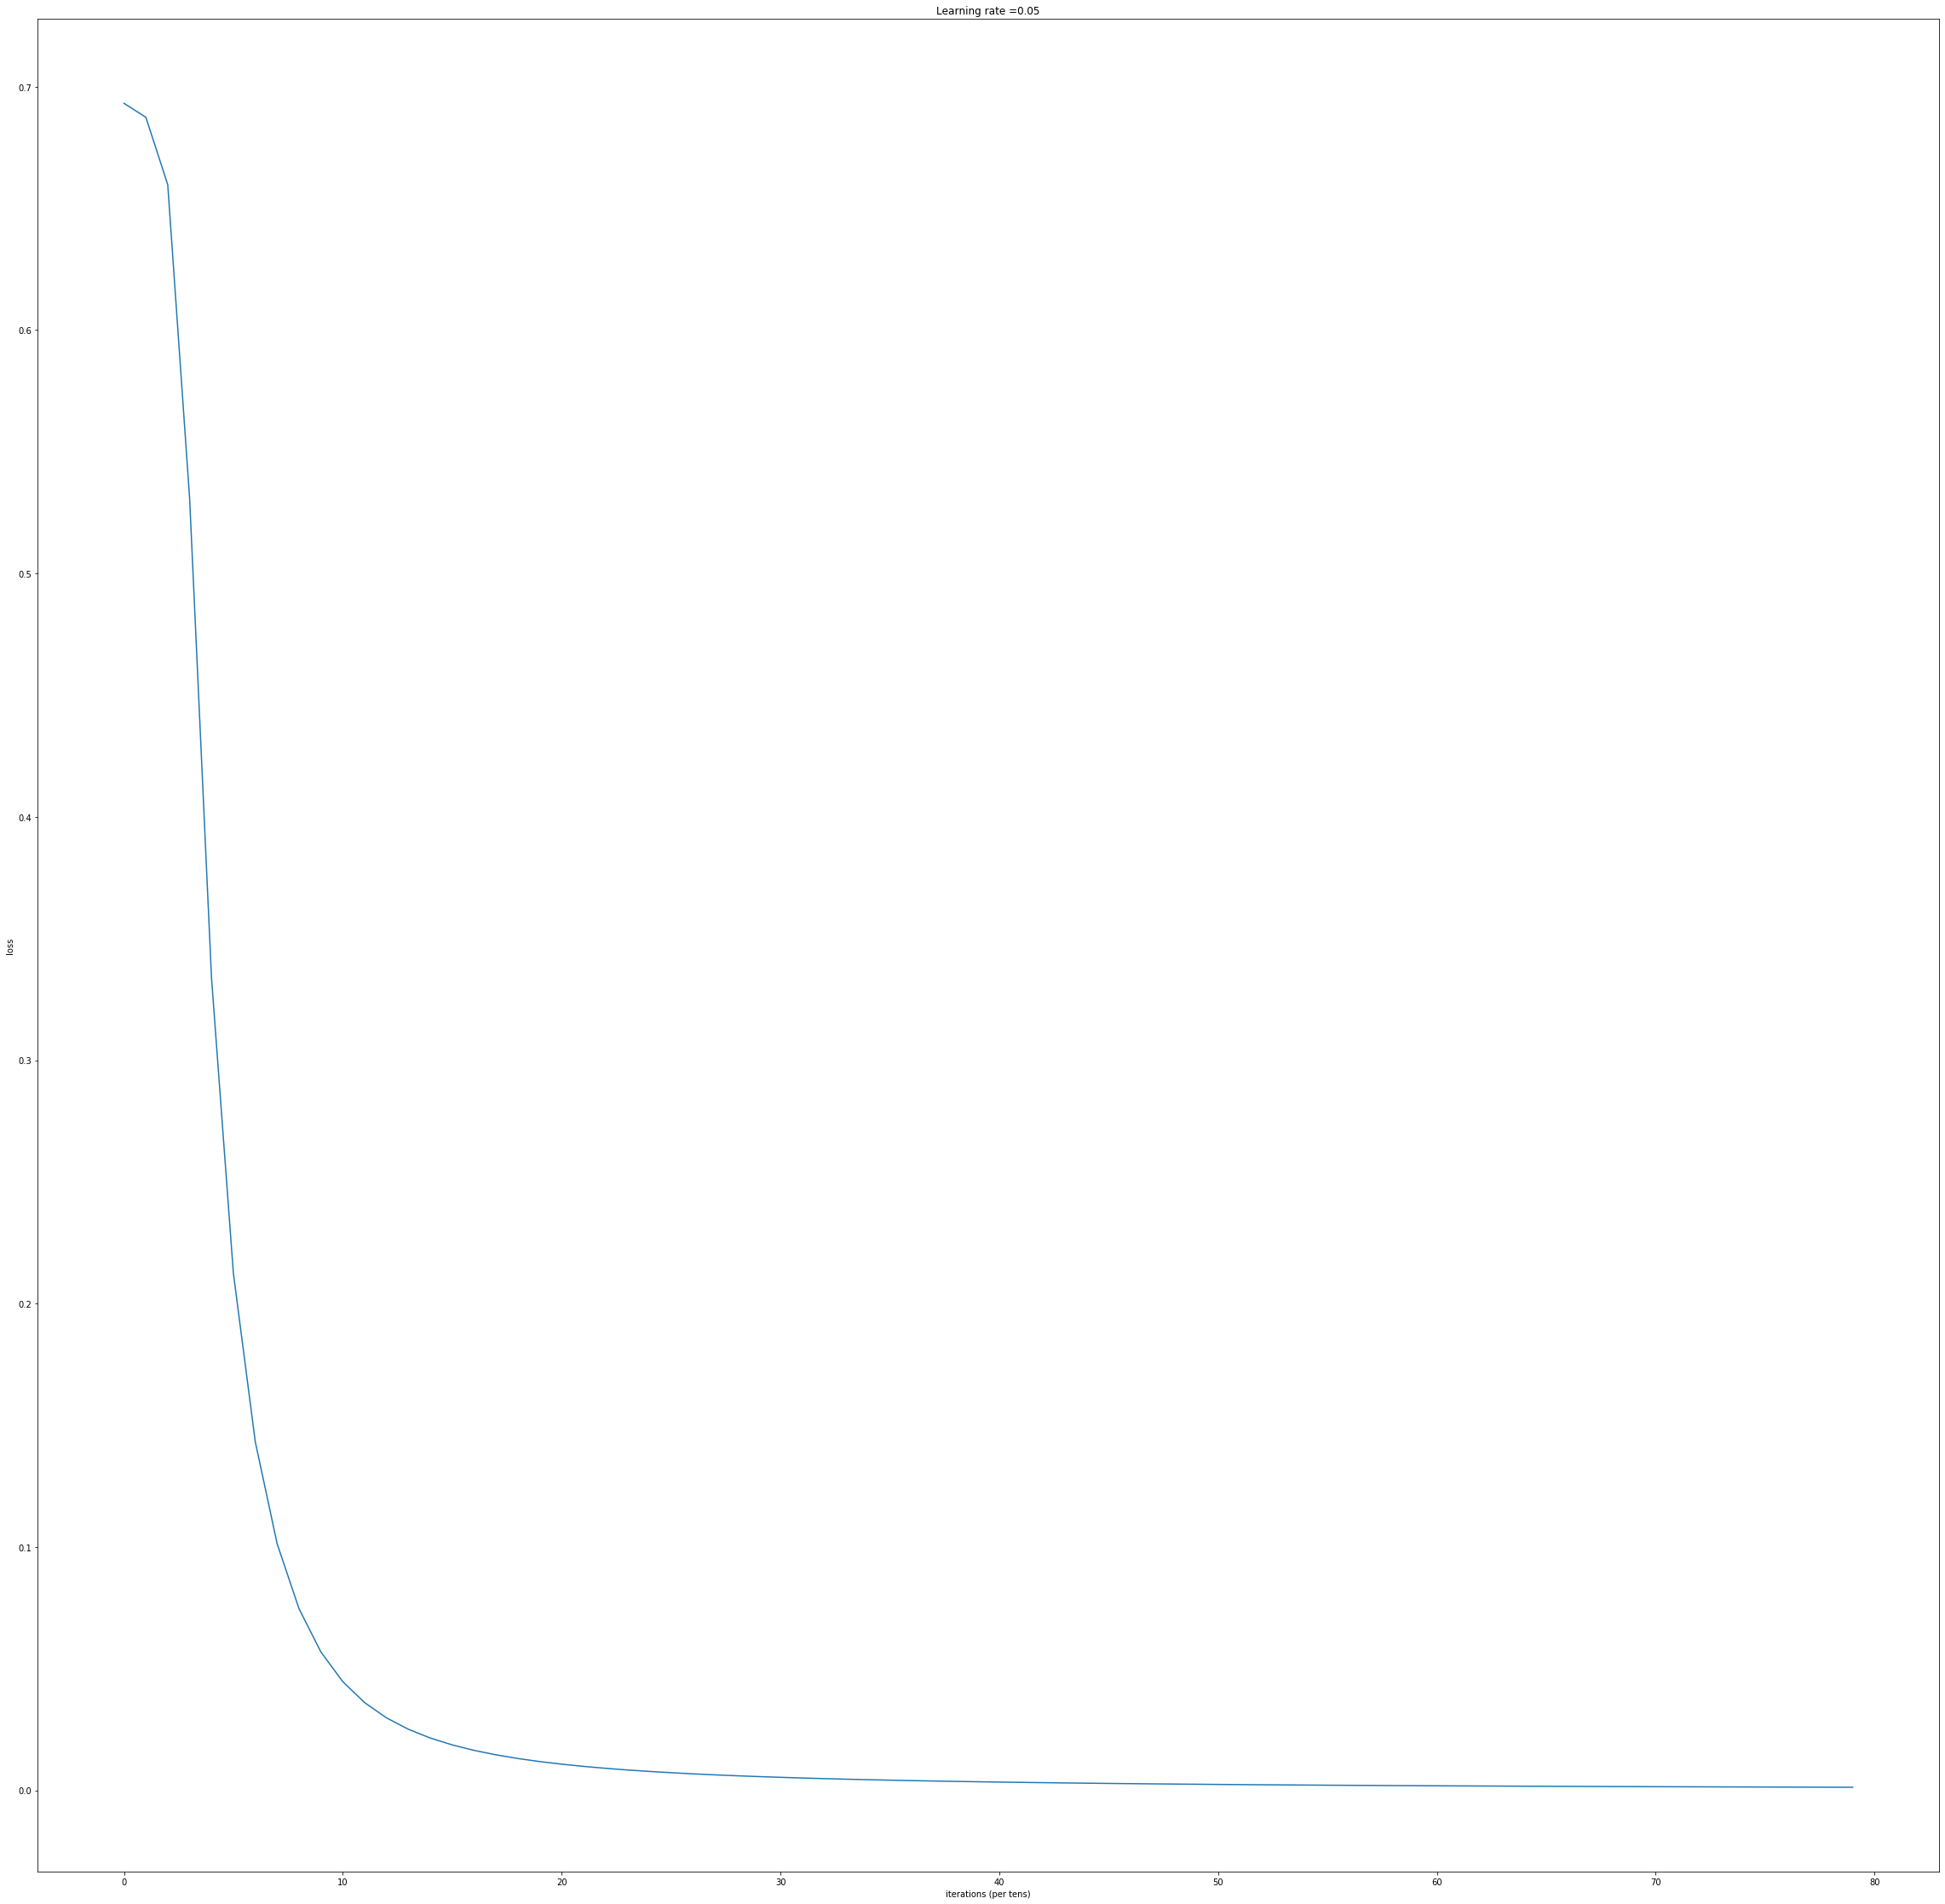

In [46]:
parameters = two_layer_model(X_train, y_train, layers_dims = (n_x, n_h, n_y), learning_rate=0.05, num_iterations = 8000, print_loss=True)

## Predict the review for our movies!

In [47]:
predictions_train = predict(X_train, y_train, parameters)

Accuracy: 0.9999999999999998


In [48]:
predictions_val = predict(X_val, y_val, parameters)

Accuracy: 0.8756218905472635


##  Results Analysis

Let's take a look at some examples the 2-layer model labeled incorrectly

In [49]:
def print_mislabeled_reviews(X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_reviews = len(mislabeled_indices[0])
    for i in range(num_reviews):
        index = mislabeled_indices[1][i]
        
        print((" ").join(cv.inverse_transform(X[index])[0]))
        print("Prediction: " + str(int(p[0,index])) + " \n Class: " + str(y[0,index]))

In [50]:
print_mislabeled_reviews(X_val.T, y_val, predictions_val)

agree apart awful best close come day decided didnt directors generally good great greatest ive james like lord masterpiece masters match money movie movies oscar people sadly said say seen st star tim time titanic trilogy truly world wrong
Prediction: 0 
 Class: 1
adult apart best bit bizarre carry caught changed clear comes didnt director documentary edward especially fact fan feelings film films girlfriend havent hes impressed include industry infamous interesting ive jr just king knew life like long loud make man mediocre mixed movie movies need needed paul people pretty really run say seen somewhat sort talent tears terrible theatre theyre time totally try week wood woods worked worst wouldnt youre
Prediction: 0 
 Class: 1
avoid away best blair body does ending entire father fellow female film flick gang girls lets like makes minutes movie old plays pointless running scene school shot showing somewhat stuck tedious utterly year
Prediction: 1 
 Class: 0
acting attempt attempts came

**Exercise**: Provide explanation as to why these examples were misclassified below.

**Type your answer here**

The main aim of the model is to predict the sentiment. As each word is taken individually, the model is failing to learn the sentiment of the current input or word from previous words and is failing to learn from the sentence as a whole.